### Importing Keras library and the IMDB dataset

Only the top 10,000 most frequently used words in the training data will be kept.

In [1]:
import keras
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

### Preparing the Data

To prepare our data, we convert our lists to tensors.

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Building the network

In the next code cells below, we will build the network for our model. Also, we will use the configurations required for this week's peer-graded assignment.

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))  #change 32 to 64 to see the model with 64 hidden units
model.add(layers.Dense(32, activation='tanh'))                        #change 32 to 64 to see the model with 64 hidden units
model.add(layers.Dense(1, activation='sigmoid'))

#the activation used is 'tanh' instead of 'relu'

In [4]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='mse',
              metrics=['accuracy'])

#the loss function is changed to mse

### Validating our model

Next, we will validate our model by testing it outside the training set

In [5]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We will now train the model using 20 epochs:

In [6]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
30/30 [==============================] - ETA: 0s - loss: 0.1458 - accuracy: 0.8023WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002903CD48048> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

In [7]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

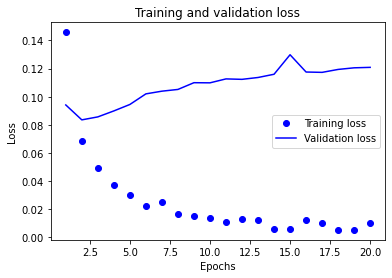

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

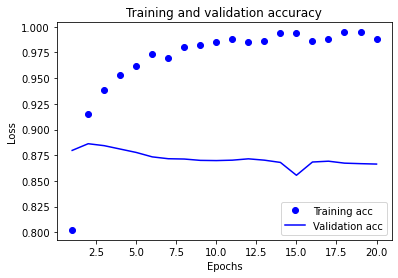

In [9]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [10]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 2ms/step - loss: 0.1350 - accuracy: 0.8512


[0.1350388079881668, 0.8511599898338318]

As you can see above, the model produces around 85% accuracy after 20 epochs. Since the validation accuracy peaked after 2 epochs, we will try to train new model with now using 2 epochs only:

In [12]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))  #change 32 to 64 to see the model with 64 hidden units
model.add(layers.Dense(32, activation='tanh'))                        #change 32 to 64 to see the model with 64 hidden units
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2, batch_size=512)

results = model.evaluate(x_test, y_test)
results

Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
49/49 [==============================] - 2s 18ms/step - loss: 0.1282 - accuracy: 0.8284
Epoch 2/2
49/49 [==============================] - 1s 15ms/step - loss: 0.0658 - accuracy: 0.9122
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' obj

[0.09283271431922913, 0.8744000196456909]

We now produced 87.44% accuracy and a lower loss than the model with 20 epochs.

### Testing the model

Now, we test the model using the test dataset.

In [13]:
model.predict([x_test])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[0.24220842],
       [0.9983804 ],
       [0.985824  ],
       ...,
       [0.16224614],
       [0.1432566 ],
       [0.8414082 ]], dtype=float32)

We are now done with training the model. We have used 32 hidden units for the layers (I also tried the 64 units but I used 32 for my submission), we also used the `tanh` activation, and the loss function was changed to `mse` instead of `binary_crossentropy`.